In [16]:
# Import required libraries
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
import hvplot.pandas
import numpy as np
%matplotlib inline

In [17]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

In [18]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca = tradeapi.REST(
            alpaca_api_key,
            alpaca_secret_key,
            api_version = "v2")

In [54]:
                        
timeframe = "1D"

today = str(datetime.datetime.today()).split()[0]

three_years_ago= str(datetime.datetime.today()- datetime.timedelta(days=1095)).split()[0]

start_date= pd.Timestamp(three_years_ago, tz="America/New_York").isoformat()

end_date= pd.Timestamp(today, tz="America/New_York").isoformat()
                       
limit_rows=1000
                           
tickers=["AGG", "SPY", "XLF", "QQQ", "EEM", "XLE", "GDX", "IWM", "IWV"]

In [55]:
print("Preparing 3 years of historical data... Please wait")
alpaca_df= alpaca.get_barset(
               tickers,
               timeframe,
               limit= limit_rows,
               start = start_date,
               end = end_date
).df

display(alpaca_df.head())
display(alpaca_df.tail())

Preparing 3 years of historical data... Please wait


AGG                                         EEM  \
                             open     high     low    close     volume   open   
time                                                                            
2018-08-14 00:00:00-04:00  106.30  106.330  106.16  106.190  3862629.0  42.64   
2018-08-15 00:00:00-04:00  106.29  106.440  106.25  106.335  4093893.0  41.54   
2018-08-16 00:00:00-04:00  106.38  106.420  106.24  106.390  2135827.0  41.92   
2018-08-17 00:00:00-04:00  106.43  106.545  106.38  106.460  1915186.0  41.62   
2018-08-20 00:00:00-04:00  106.59  106.680  106.53  106.650  2105513.0  42.31   

                                                            ...    XLE  \
                            high    low   close     volume  ...   open   
time                                                        ...          
2018-08-14 00:00:00-04:00  42.86  42.56  42.759   46984052  ...  74.90   
2018-08-15 00:00:00-04:00  41.71  41.13  41.520  121761815  ...  73.80   
2018-08-16 00:00:00-04:00  42.11  41.75  41.770   66452493  ...  72.26   
2018-08-17 00:00:00-04:00  42.31  41.52  42.210   63827483  ...  72.62   
2018-08-20 00:00:00-04:00  42.44  42.17  42.400   45200529  ...  72.63   

                                                              XLF         \
                             high     low  close    volume   open   high   
time                                                                       
2018-08-14 00:00:00-04:00  75.010  74.201  74.51   7597129  27.80  28.01   
2018-08-15 00:00:00-04:00  73.920  71.700  71.91  23545221  27.73  27.88   
2018-08-16 00:00:00-04:00  72.840  72.220  72.43  12322849  27.87  28.19   
2018-08-17 00:00:00-04:00  72.800  72.345  72.63   9295197  28.04  28.21   
2018-08-20 00:00:00-04:00  73.355  72.600  73.11   7192157  28.17  28.31   

                                                   
                             low  close    volume  
time                                               
2018-08-14 00:00:00-04:00  27.72  27.94  40544993  
2018-08-15 00:00:00-04:00  27.61  27.75  51269592  
2018-08-16 00:00:00-04:00  27.87  28.10  40984808  
2018-08-17 00:00:00-04:00  28.03  28.16  36517847  
2018-08-20 00:00:00-04:00  28.13  28.25  25473384  

[5 rows x 45 columns]

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2021-08-09 00:00:00-04:00  115.89  115.9600  115.5800  115.59  5003990.0   
2021-08-10 00:00:00-04:00  115.65  115.6500  115.4350  115.44  6692325.0   
2021-08-11 00:00:00-04:00  115.46  115.7000  115.3400  115.55  6423130.0   
2021-08-12 00:00:00-04:00  115.49  115.5799  115.4000  115.54  4248390.0   
2021-08-13 00:00:00-04:00  115.65  115.9700  115.6401  115.97  4455924.0   

                              EEM                                  ...    XLE  \
                             open   high     low  close    volume  ...   open   
time                                                               ...          
2021-08-09 00:00:00-04:00  52.165  52.30  52.050  52.12  18010347  ...  48.79   
2021-08-10 00:00:00-04:00  52.330  52.36  52.105  52.21  13352348  ...  49.05   
2021-08-11 00:00:00-04:00  52.500  52.50  52.085  52.33  19908212  ...  49.54   
2021-08-12 00:00:00-04:00  51.880  51.90  51.650  51.85  22966118  ...  50.02   
2021-08-13 00:00:00-04:00  51.640  51.73  51.390  51.72  25863365  ...  50.04   

                                                             XLF           \
                             high    low  close    volume   open     high   
time                                                                        
2021-08-09 00:00:00-04:00  49.200  48.48  48.82  20123717  37.81  38.1350   
2021-08-10 00:00:00-04:00  49.800  49.01  49.66  25985934  37.93  38.4700   
2021-08-11 00:00:00-04:00  50.145  49.23  50.05  23343320  38.47  38.8099   
2021-08-12 00:00:00-04:00  50.290  49.40  50.01  16281505  38.84  38.9200   
2021-08-13 00:00:00-04:00  50.040  49.30  49.37  15105614  38.90  38.9500   

                                                    
                              low  close    volume  
time                                                
2021-08-09 00:00:00-04:00  37.600  37.97  44764583  
2021-08-10 00:00:00-04:00  37.885  38.36  39531632  
2021-08-11 00:00:00-04:00  38.290  38.80  46109872  
2021-08-12 00:00:00-04:00  38.600  38.86  39521426  
2021-08-13 00:00:00-04:00  38.490  38.58  36123004  

[5 rows x 45 columns]

In [56]:
# Creating a DataFrame that holds the closing prices for each ETF and dropping the time component from the index
closing_prices_df= pd.DataFrame()

for ticker in tickers:
    closing_prices_df[ticker]=alpaca_df[ticker]["close"]
    
closing_prices_df.index= closing_prices_df.index.date
closing_prices_df.head()

,AGG,SPY,XLF,QQQ,EEM,XLE,GDX,IWM,IWV
2018-08-14,106.190,283.86,27.94,181.47,42.759,74.51,19.77,168.22,168.84
2018-08-15,106.335,281.76,27.75,179.29,41.520,71.91,18.58,166.09,167.44
2018-08-16,106.390,284.10,28.10,179.82,41.770,72.43,18.17,167.59,168.80
2018-08-17,106.460,285.02,28.16,179.87,42.210,72.63,18.70,168.38,169.41
2018-08-20,106.650,285.71,28.25,179.70,42.400,73.11,18.80,168.79,169.82


In [57]:
#Calculating daily returns and removing the rows of data that have missing values
daily_returns= closing_prices_df.pct_change().dropna()
daily_returns.head()

,AGG,SPY,XLF,QQQ,EEM,XLE,GDX,IWM,IWV
2018-08-15,0.001365,-0.007398,-0.006800,-0.012013,-0.028976,-0.034895,-0.060192,-0.012662,-0.008292
2018-08-16,0.000517,0.008305,0.012613,0.002956,0.006021,0.007231,-0.022067,0.009031,0.008122
2018-08-17,0.000658,0.003238,0.002135,0.000278,0.010534,0.002761,0.029169,0.004714,0.003614
2018-08-20,0.001785,0.002421,0.003196,-0.000945,0.004501,0.006609,0.005348,0.002435,0.002420
2018-08-21,-0.000703,0.001890,0.003894,0.003561,0.012500,0.005061,0.006117,0.011494,0.003415


In [58]:
#Creates a summary data of daily returns for each ETF
daily_returns.describe()

,AGG,SPY,XLF,QQQ,EEM,XLE,GDX,IWM,IWV
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,0.000123,0.000703,0.000609,0.001078,0.000373,-0.000214,0.001000,0.000524,0.000703
std,0.003572,0.014456,0.019016,0.016551,0.015478,0.025594,0.025595,0.017915,0.014776
min,-0.040343,-0.116340,-0.139021,-0.125748,-0.124550,-0.201459,-0.180578,-0.137009,-0.122794
25%,-0.001077,-0.003918,-0.007230,-0.004965,-0.006997,-0.010879,-0.011603,-0.007115,-0.003873
50%,0.000217,0.001056,0.001302,0.001860,0.001604,0.000000,0.000000,0.000903,0.001115
75%,0.001409,0.006859,0.008641,0.008767,0.008295,0.011418,0.014110,0.009344,0.006852
max,0.027948,0.094737,0.134086,0.094274,0.076923,0.166525,0.154865,0.093559,0.099517


In [59]:
# Daynamic visaulisation of daily returns for each ETF
daily_returns.hvplot.box(title= "ETF Daily Returns covering the period of last three years", 
                     ylabel= "Daily Returns", xlabel= "ETF Ticker", size=(30,15)
)

:BoxWhisker   [Variable]   (value)

***Analysis***
Out of all the above ETFs XLE seems to be the most volatile.  

In [45]:
# Calculcates The Cumulative Returns on an investment over the period of last 3 years
cumulative_returns= (1+ daily_returns).cumprod()
cumulative_returns.tail(1)

,AGG,SPY,XLF,QQQ,EEM,XLE,TQQQ,IWM,IWV
2021-08-13,1.092099,1.570845,1.380816,2.032402,1.20957,0.662596,2.054774,1.314231,1.564558


In [46]:
# Dynamic visualisation of cumulative returns of all ETFS over the period of last 3 years
cumulative_returns.hvplot(title= "Cumulative returns of all ETFS the period of last three years", 
                     ylabel= "Daily Returns", xlabel= "Date")


:NdOverlay   [Variable]
   :Curve   [index]   (value)

***Analysis***
We can take SPY as a proxy to a market, because it is designed to track S&P 500 stock market index.
Based on the above data we can see that QQQ which tracks NASDAQ-100 Index outperfomed the market and the rest of the above ETFs.  

In [47]:
# Evaluating the risk profile of each ETFs by calculating the standard deviation and sorting them in an ascending order.
standard_deviation = daily_returns.std()
standard_deviation.sort_values()
display(standard_deviation)
print(
          f"The *least* volatile ETF is {standard_deviation.index[0]} with a Standard Deviation of: {round(standard_deviation[0], 3)}\n"
          f"The *most* volatile ETF is {standard_deviation.index[-1]} with a Standard Deviation of: {round(standard_deviation[-1], 3)}\n"
    )

AGG     0.003572
SPY     0.014456
XLF     0.019016
QQQ     0.016552
EEM     0.015478
XLE     0.025594
TQQQ    0.052044
IWM     0.017915
IWV     0.014776
dtype: float64

The *least* volatile ETF is AGG with a Standard Deviation of: 0.004
The *most* volatile ETF is IWV with a Standard Deviation of: 0.015



In [48]:
# Evaluating the risk profile of each ETFs by calculating the standard deviation and sorting them in an ascending order.
annual_standard_deviation = standard_deviation * np.sqrt(252)
annual_standard_deviation.sort_values()
display(annual_standard_deviation)
print(
          f"When annualised, The *least* volatile ETF is {annual_standard_deviation.index[0]} with a Standard Deviation of: {round(annual_standard_deviation[0], 3)}\n"
          f"When annualised, The *most* volatile ETF is {annual_standard_deviation.index[-1]} with a Standard Deviation of: {round(annual_standard_deviation[-1], 3)}\n"
    )

AGG     0.056698
SPY     0.229477
XLF     0.301868
QQQ     0.262748
EEM     0.245711
XLE     0.406289
TQQQ    0.826169
IWM     0.284386
IWV     0.234569
dtype: float64

When annualised, The *least* volatile ETF is AGG with a Standard Deviation of: 0.057
When annualised, The *most* volatile ETF is IWV with a Standard Deviation of: 0.235



In [35]:
# Calculates and plots a 30-day rolling standard deviation for all ETFs

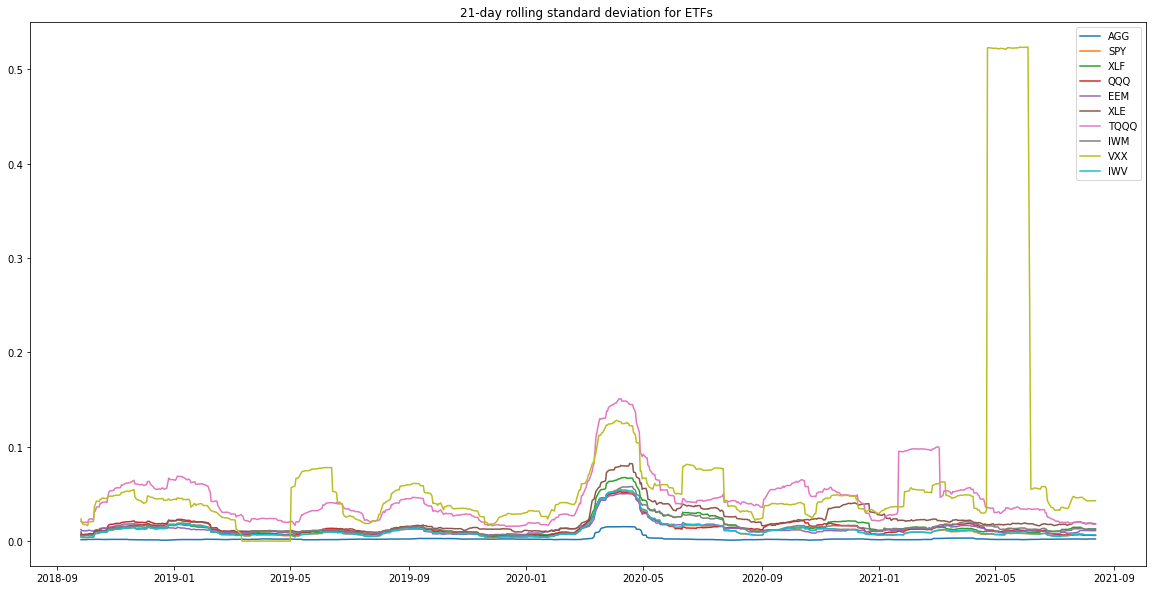

In [36]:
rolling_std = daily_returns.rolling(window = 30).std()
rolling_std.plot(figsize= (20,10), 
                 title = '21-day rolling standard deviation for ETFs ')
